In [1]:
#Step 1-import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Step 2-Loading the dataset
df = pd.read_csv("/content/zomato.csv")
print(df)

                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
15781  https://www.zomato.com/bangalore/the-buffet-ta...   
15782  https://www.zomato.com/bangalore/shift-hsr?con...   
15783  https://www.zomato.com/bangalore/broadway-the-...   
15784  https://www.zomato.com/bangalore/onesta-hsr?co...   
15785  https://www.zomato.com/bangalore/bonum-cibum-h...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stag

In [8]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [31]:
#Step 3: Data Cleaning and Preparation
#1. Convert the rate column to a float by removing denominator characters.
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    if value == 'NEW' or value == '-':
        return np.nan
    return float(value)

In [32]:
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1  775.0    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1  787

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15786 entries, 0 to 15785
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          15786 non-null  object 
 1   address                      15785 non-null  object 
 2   name                         15785 non-null  object 
 3   online_order                 15785 non-null  object 
 4   book_table                   15785 non-null  object 
 5   rate                         12546 non-null  float64
 6   votes                        15785 non-null  float64
 7   phone                        15447 non-null  object 
 8   location                     15782 non-null  object 
 9   rest_type                    15718 non-null  object 
 10  dish_liked                   6944 non-null   object 
 11  cuisines                     15773 non-null  object 
 12  approx_cost(for two people)  15739 non-null  object 
 13  reviews_list    

In [34]:
#Checking for missing or null values to identify any data gaps.
print(df.isnull().sum())

url                               0
address                           1
name                              1
online_order                      1
book_table                        1
rate                           3240
votes                             1
phone                           339
location                          4
rest_type                        68
dish_liked                     8842
cuisines                         13
approx_cost(for two people)      47
reviews_list                      1
menu_item                         1
listed_in(type)                   1
listed_in(city)                   1
dtype: int64


Text(0.5, 0, 'Type of restaurant')

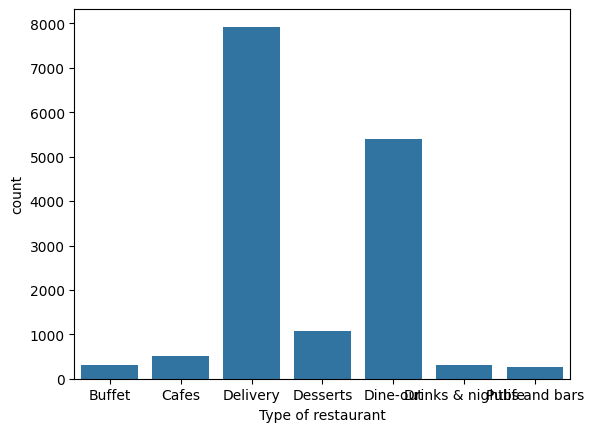

In [35]:
#Step 4-Exploring Restaurant Types
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion- The majority of restaurants fall into Delivery category.

Text(0, 0.5, 'Votes')

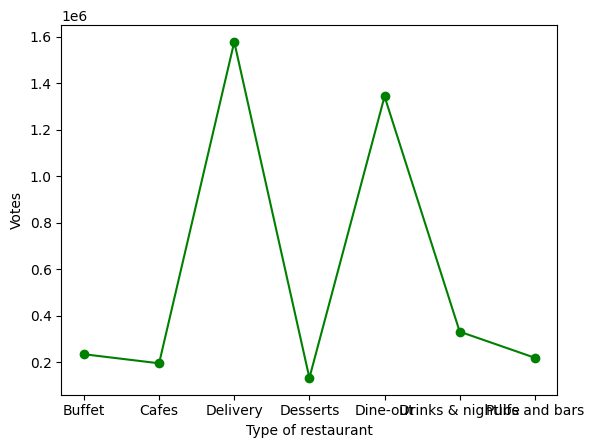

In [36]:
#to get the count of votes for each category
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Conclusion -Delivery restaurants are preferred by most of the customers


In [37]:
#Step 5: Identify the Most Voted Restaurant
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
3921    Byg Brewski Brewing Company
4801    Byg Brewski Brewing Company
4944    Byg Brewski Brewing Company
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

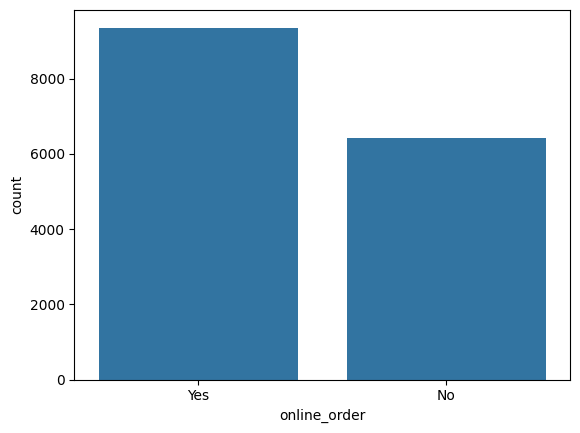

In [38]:
#Step 6: Online Order Availability
sns.countplot(x=df['online_order'])

Conclusion: This suggests that a majority of the restaurants accept online orders.

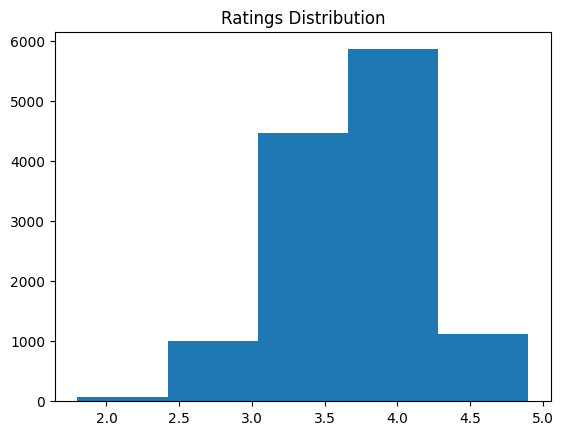

In [39]:
#Step 7: Analyze Ratings
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

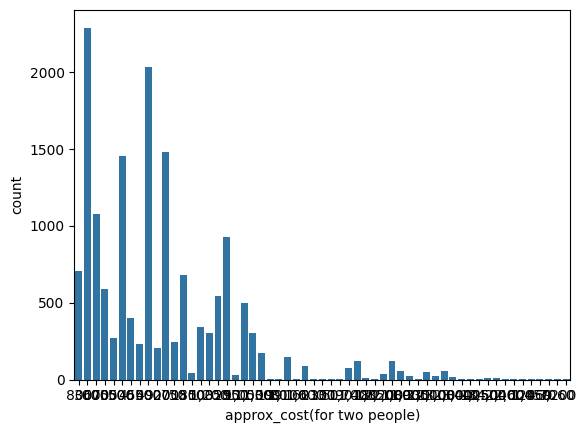

In [41]:
#Step 8: Approximate Cost for Couples
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

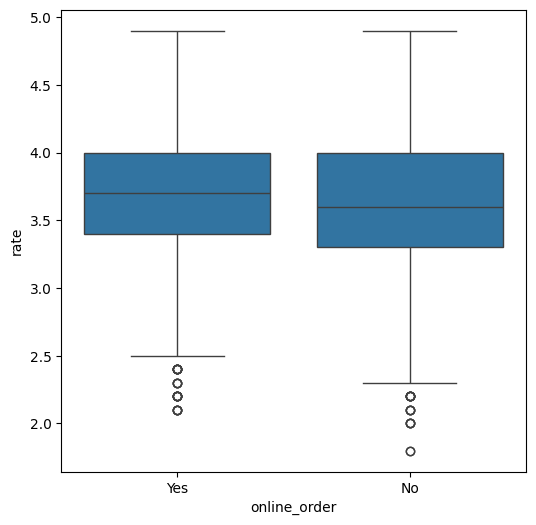

In [42]:
#Step 9: Ratings Comparison - Online vs Offline Orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

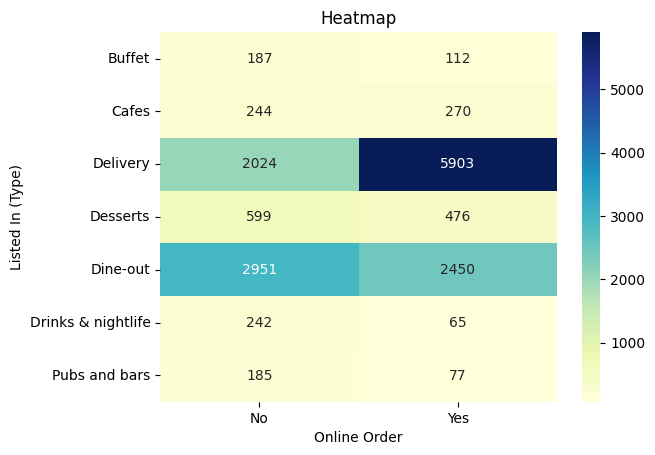

In [43]:
#Step 10: Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()